# Day 4

### Topics

1. Bit of a review
  * Licenses and data origin
1. Pandas functions
1. Pandas $\rightarrow$ NumPy
1. Fig-Axis interaction in `matplotlib`
1. Plotting with style (plt.style and `with`)


First, import our usual things:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Bit of a review

Last time we played around with the TV dataset after we read it into Pandas.

In [2]:
movies = pd.read_csv('~/Downloads/tv_shows.csv')

We can take a quick look at our data in a table form with:

In [3]:
movies

Unnamed: 0                            Title  Year  Age  IMDb  \
0              0                     Breaking Bad  2008  18+   9.5   
1              1                  Stranger Things  2016  16+   8.8   
2              2                      Money Heist  2017  18+   8.4   
3              3                         Sherlock  2010  16+   9.1   
4              4                 Better Call Saul  2015  18+   8.7   
...          ...                              ...   ...  ...   ...   
5606        5606  Tut's Treasures: Hidden Secrets  2018  NaN   NaN   
5607        5607                 Paradise Islands  2017  NaN   NaN   
5608        5608                      Wild Russia  2018  NaN   NaN   
5609        5609                      Love & Vets  2017  NaN   NaN   
5610        5610         United States of Animals  2016  NaN   NaN   

     Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  type  
0                96%        1     0            0        0     1  
1                93%        1     0            0        0     1  
2                91%        1     0            0        0     1  
3                78%        1     0            0        0     1  
4                97%        1     0            0        0     1  
...              ...      ...   ...          ...      ...   ...  
5606             NaN        0     0            0        1     1  
5607             NaN        0     0            0        1     1  
5608             NaN        0     0            0        1     1  
5609             NaN        0     0            0        1     1  
5610             NaN        0     0            0        1     1  

[5611 rows x 11 columns]

### License & Origin of this data

Let's think a bit more about this dataset.

We found it here: https://www.kaggle.com/ruchi798/tv-shows-on-netflix-prime-video-hulu-and-disney

We can see where this data came from: it was scraped (this means [web-scraped](https://realpython.com/beautiful-soup-web-scraper-python/)) from Reelgood.com

We also are told a bit about what *we* can do with the data under the License area on Kaggle which says its Public Domain, meaning we can do whatever we want with it essentially!

We can also just look at the top bit of our data with:

In [4]:
movies.head()

Unnamed: 0             Title  Year  Age  IMDb Rotten Tomatoes  Netflix  \
0           0      Breaking Bad  2008  18+   9.5             96%        1   
1           1   Stranger Things  2016  16+   8.8             93%        1   
2           2       Money Heist  2017  18+   8.4             91%        1   
3           3          Sherlock  2010  16+   9.1             78%        1   
4           4  Better Call Saul  2015  18+   8.7             97%        1   

   Hulu  Prime Video  Disney+  type  
0     0            0        0     1  
1     0            0        0     1  
2     0            0        0     1  
3     0            0        0     1  
4     0            0        0     1

We can access individual rows of our data with `.iloc`:

In [5]:
movies.iloc[55:65,:]

Unnamed: 0                                   Title  Year  Age  IMDb  \
55          55                     Pretty Little Liars  2010  16+   7.4   
56          56                            Unbelievable  2019  18+   8.4   
57          57                                   Arrow  2012  16+   7.6   
58          58                            The IT Crowd  2006  16+   8.5   
59          59                       The Twilight Zone  1959   7+   9.0   
60          60                                     YOU  2018  18+   7.8   
61          61                           Sex Education  2019  16+   8.3   
62          62  Tiger King: Murder, Mayhem and Madness  2020  18+   7.8   
63          63          Star Trek: The Next Generation  1987   7+   8.6   
64          64                             Broadchurch  2013  18+   8.4   

   Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  type  
55             81%        1     1            0        0     1  
56             97%        1     0            0        0     1  
57             85%        1     0            0        0     1  
58             87%        1     0            0        0     1  
59             82%        1     1            0        0     1  
60             91%        1     0            0        0     1  
61             94%        1     0            0        0     1  
62             86%        1     0            0        0     1  
63             89%        1     1            1        0     1  
64             92%        1     0            0        0     1

We can also do this with columns by index:

In [6]:
movies.iloc[:,1:3]

Title  Year
0                        Breaking Bad  2008
1                     Stranger Things  2016
2                         Money Heist  2017
3                            Sherlock  2010
4                    Better Call Saul  2015
...                               ...   ...
5606  Tut's Treasures: Hidden Secrets  2018
5607                 Paradise Islands  2017
5608                      Wild Russia  2018
5609                      Love & Vets  2017
5610         United States of Animals  2016

[5611 rows x 2 columns]

Or by named column with `.loc` (instead of `.iloc`):

In [7]:
movies.loc[:,['Title', 'Year']]

Title  Year
0                        Breaking Bad  2008
1                     Stranger Things  2016
2                         Money Heist  2017
3                            Sherlock  2010
4                    Better Call Saul  2015
...                               ...   ...
5606  Tut's Treasures: Hidden Secrets  2018
5607                 Paradise Islands  2017
5608                      Wild Russia  2018
5609                      Love & Vets  2017
5610         United States of Animals  2016

[5611 rows x 2 columns]

We can print out the names of the columns in our dataset:

In [8]:
movies.columns

Index(['Unnamed: 0', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'type'],
      dtype='object')

Note: "Unnamed: 0" is just an extra column that *also* contains the index.  This is actually telling us this person saved this from a Pandas DataFrame but didn't select `index=False` when they saved it :)

We can also print out a summary of our dataset:

In [9]:
movies.describe()

Unnamed: 0         Year         IMDb      Netflix         Hulu  \
count  5611.000000  5611.000000  4450.000000  5611.000000  5611.000000   
mean   2805.000000  2011.021030     7.113258     0.344145     0.312600   
std    1619.900511    11.005116     1.132060     0.475131     0.463594   
min       0.000000  1901.000000     1.000000     0.000000     0.000000   
25%    1402.500000  2010.000000     6.600000     0.000000     0.000000   
50%    2805.000000  2015.000000     7.300000     0.000000     0.000000   
75%    4207.500000  2017.000000     7.900000     1.000000     1.000000   
max    5610.000000  2020.000000     9.600000     1.000000     1.000000   

       Prime Video      Disney+    type  
count  5611.000000  5611.000000  5611.0  
mean      0.382107     0.032080     1.0  
std       0.485946     0.176228     0.0  
min       0.000000     0.000000     1.0  
25%       0.000000     0.000000     1.0  
50%       0.000000     0.000000     1.0  
75%       1.000000     0.000000     1.0  
max       1.000000     1.000000     1.0

Note that this only does "summary statistics" like the mean, standdard deviation (STD) - a measure of the "spread" of the dataset, min & max for the numerical data.

Also note that some of this summary doesn't actually make sense.  For example, the "mean index" is just the 1/2 point of our dataset!  Also, does the mean year have any meaning?  It may or may not, depending on your application.

This just means we have to be careful when we use these functions!

## More on Pandas Functions

There are also some "built-in" functions for this data.  For example, we can take the average (mean) IMDb score ourselves:

In [10]:
movies['IMDb'].mean()

7.1132584269662855

Or we could count the number of titles available on Hulu:

In [11]:
movies['Hulu'].sum() # each row has an entry either 0 or 1 that tells us a NOT or YES on this platform

1754

We can also do this for a variety of columns:

In [12]:
movies[['Hulu', 'Prime Video', 'Disney+']].sum()

Hulu           1754
Prime Video    2144
Disney+         180
dtype: int64

In the above we passed in a *list* of columns to take the sum over.

But what about taking a sum over sections of *rows*?

We can ask, across Netflix, Hulu, Prime Video and Disney+ -- how many of these platforms support each title?

Let's build this up bit by bit.  First, let's look at the subset of data that we might be interested in:

In [13]:
movies.loc[:,['Title','Netflix', 'Hulu', 'Prime Video', 'Disney+']]

Title  Netflix  Hulu  Prime Video  Disney+
0                        Breaking Bad        1     0            0        0
1                     Stranger Things        1     0            0        0
2                         Money Heist        1     0            0        0
3                            Sherlock        1     0            0        0
4                    Better Call Saul        1     0            0        0
...                               ...      ...   ...          ...      ...
5606  Tut's Treasures: Hidden Secrets        0     0            0        1
5607                 Paradise Islands        0     0            0        1
5608                      Wild Russia        0     0            0        1
5609                      Love & Vets        0     0            0        1
5610         United States of Animals        0     0            0        1

[5611 rows x 5 columns]

Note: you can also do `movies[['Title','Netflix', 'Hulu', 'Prime Video', 'Disney+']]` in this case.

Now we want to add all across all rows that are not the Title.  There are a few ways to do this and you should definetly check out the [Pandas docs](https://pandas.pydata.org/docs/) for more info.

I'm going to do this in a few steps.  First, let's isolate those 4 columns:

In [14]:
movies.loc[:,['Netflix', 'Hulu', 'Prime Video', 'Disney+']]

Netflix  Hulu  Prime Video  Disney+
0           1     0            0        0
1           1     0            0        0
2           1     0            0        0
3           1     0            0        0
4           1     0            0        0
...       ...   ...          ...      ...
5606        0     0            0        1
5607        0     0            0        1
5608        0     0            0        1
5609        0     0            0        1
5610        0     0            0        1

[5611 rows x 4 columns]

Let's try using "sum" here:

In [15]:
movies.loc[:,['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()

Netflix        1931
Hulu           1754
Prime Video    2144
Disney+         180
dtype: int64

Hmmmm, that's not quite right, that's just what we were doing before!  Now I'm going to re-call this, but specify an axis parameter:

In [16]:
movies.loc[:,['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum(axis=1)

0       1
1       1
2       1
3       1
4       1
       ..
5606    1
5607    1
5608    1
5609    1
5610    1
Length: 5611, dtype: int64

That looks to be more like it!  We can even double check the min of this:

In [17]:
movies.loc[:,['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum(axis=1).min()

1

and the max:

In [18]:
movies.loc[:,['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum(axis=1).max()

3

So, this sort of makes sense with our understanding of how streaming services work -- usually a title is on one or two but not all of these services.

Ok!  We are almost there!  Let's actually add our summation calculation back into our dataset:

In [19]:
movies['Total Service'] = movies.loc[:,['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum(axis=1)

And now take a look:

In [20]:
movies.head()

Unnamed: 0             Title  Year  Age  IMDb Rotten Tomatoes  Netflix  \
0           0      Breaking Bad  2008  18+   9.5             96%        1   
1           1   Stranger Things  2016  16+   8.8             93%        1   
2           2       Money Heist  2017  18+   8.4             91%        1   
3           3          Sherlock  2010  16+   9.1             78%        1   
4           4  Better Call Saul  2015  18+   8.7             97%        1   

   Hulu  Prime Video  Disney+  type  Total Service  
0     0            0        0     1              1  
1     0            0        0     1              1  
2     0            0        0     1              1  
3     0            0        0     1              1  
4     0            0        0     1              1

Hey cool!  Now we have a whole extra column to our dataset!  Let's plot it with a Pandas plot call:

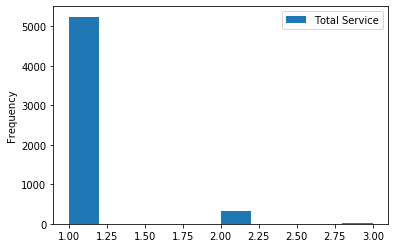

In [21]:
movies.plot(y='Total Service', kind='hist')
plt.show()

So, as expected, we that most of the titles are on only 1 streaming service and very few are on 2, and even fewer are on 3.

Now, those axis don't look quite right -- we know that there are no 1/2 services!  Let's see how we can see what parameters are available to us in this plot:

In [22]:
movies.plot?

So, from this pop up doc, we see that there is something called `xticks`.  Let's explicitly put in the numbers 0-4:

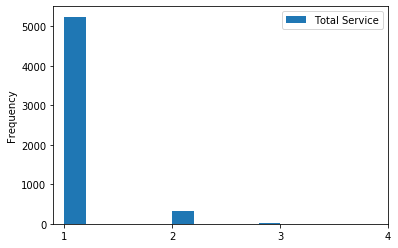

In [23]:
movies.plot(y='Total Service', kind='hist', xticks=[1,2,3,4])

This depicts indeed that there are no cases where a title appears on all 4 streaming services.  

Let's try one more thing listed in the parameters -- log scale the y-axis:

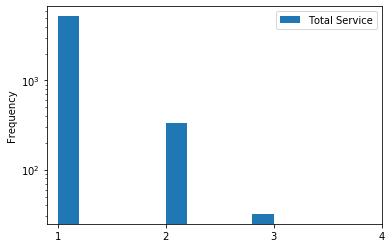

In [24]:
movies.plot(y='Total Service', kind='hist', xticks=[1,2,3,4], logy=True)
plt.show()

This shows that there are ~5000 titles available on 1 service, ~300 on 2 services, and it looks like ~30 on 3 services.

### Take aways

1. We did a lot of data exploration & processing before we actually got to a plot that we liked -- this is normal!
1. We did much of the data processing & plotting "step-by-step" -- we didn't just start right away with the answer, we had to try a few things and slowly build up to a solution we liked.  This is also normal!

Much of what we do in data viz is data processing to get our data in a form that actually "works" for data viz!

## Pandas $\rightarrow$ NumPy

There is a lot of interaction between NumPy and Pandas.  In fact the "sum" we just did is basically implemented in NumPy.  There are ways to go between Pandas & NumPy.  Here is one way to get a NumPy array from a Pandas DataFrame.

Let's go back to that array of for columns:

In [25]:
movies.loc[:,['Netflix', 'Hulu', 'Prime Video', 'Disney+']]

Netflix  Hulu  Prime Video  Disney+
0           1     0            0        0
1           1     0            0        0
2           1     0            0        0
3           1     0            0        0
4           1     0            0        0
...       ...   ...          ...      ...
5606        0     0            0        1
5607        0     0            0        1
5608        0     0            0        1
5609        0     0            0        1
5610        0     0            0        1

[5611 rows x 4 columns]

We can grab the "values" of this Subset DataFrame and we get back out a NumPy array:

In [26]:
movies.loc[:,['Netflix', 'Hulu', 'Prime Video', 'Disney+']].values

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

Let's store this in a variable:

In [27]:
myArray = movies.loc[:,['Netflix', 'Hulu', 'Prime Video', 'Disney+']].values

What is the type of this data?

In [28]:
type(myArray)

numpy.ndarray

This tells us we are getting a NumPy array back!

We can then sum this like before:

In [29]:
myArray.sum(axis=1) # counts number of services

array([1, 1, 1, ..., 1, 1, 1])

And then we can plot using `matplotlib` like before:

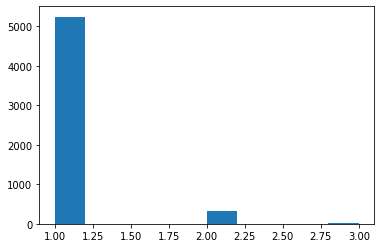

In [30]:
plt.hist(myArray.sum(axis=1))
plt.show()

Look's familiar!

## Fig/Axis calls to `matplotlib`

Let's go back to plotting GDP:

In [31]:
gdp = pd.read_csv("https://raw.githubusercontent.com/UIUC-iSchool-DataViz/spring2020/master/week01/data/GDP.csv")

In [32]:
gdp

DATE        GDP
0    1947-01-01    243.164
1    1947-04-01    245.968
2    1947-07-01    249.585
3    1947-10-01    259.745
4    1948-01-01    265.742
..          ...        ...
286  2018-07-01  20749.752
287  2018-10-01  20897.804
288  2019-01-01  21098.827
289  2019-04-01  21340.267
290  2019-07-01  21542.540

[291 rows x 2 columns]

If we recall, we had to do some data manipulation:

In [33]:
gdp['DATE'] = pd.to_datetime(gdp['DATE'])

And we got to the following plot:

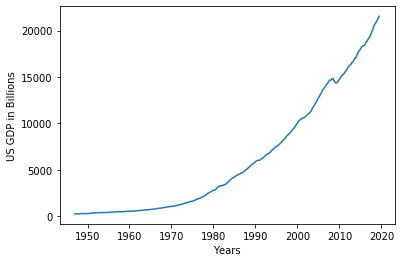

In [34]:
plt.plot(gdp['DATE'], gdp['GDP'])
plt.xlabel('Years')
plt.ylabel('US GDP in Billions')
plt.show()

So this is a fine way to interact with plots, but there is another way to interact with `matplotlib` through figure and axis "objects".  I'm going to make the above plot with these calls and then we'll talk about what just happened:

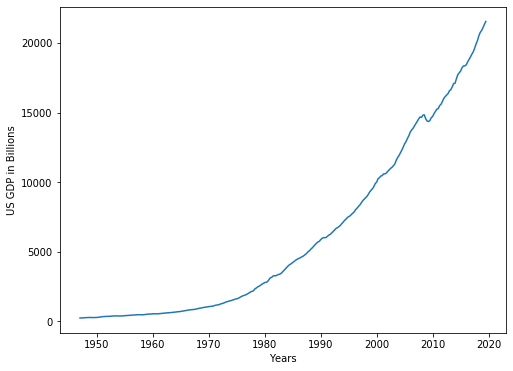

In [35]:
fig, ax = plt.subplots(1,1,figsize=(8,6)) # creating figure & axis objects

ax.plot(gdp['DATE'], gdp['GDP']) # plot now on the *axis object*
ax.set_xlabel('Years') # note the set_ in the front!
ax.set_ylabel('US GDP in Billions')

plt.show()

So, its a bit bigger than before, but essentially there!

So what are these new things?  This `fig` and `ax` thing?  Well `fig` is an object that actually stores our figure:

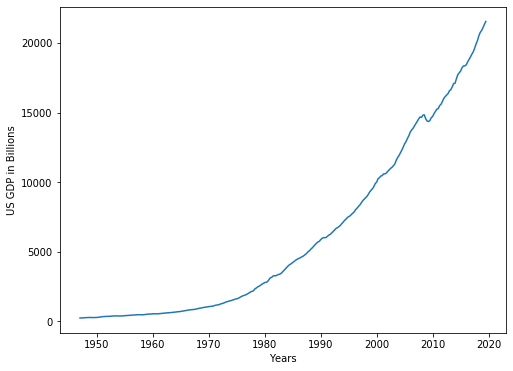

In [36]:
fig

`ax` is an axis object that sort of "holds" all the plotting info:

In [37]:
ax

The `set_` we have to add in is a function attached to this object.  We can use `get_` to retrieve info about our plot.  For example, the axis labels:

In [38]:
ax.get_xlabel()

'Years'

In [39]:
ax.get_ylabel()

'US GDP in Billions'

## Plotting with style

We've been using the default "style" for our plots, but it turns out there are a few different styles associated with `matplotlib`:

In [40]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

But what do these all mean?  These are different collections of ways that our plot line colors, fonts, thicknesses, sizes will be chosen for us.  Let's try a new one:

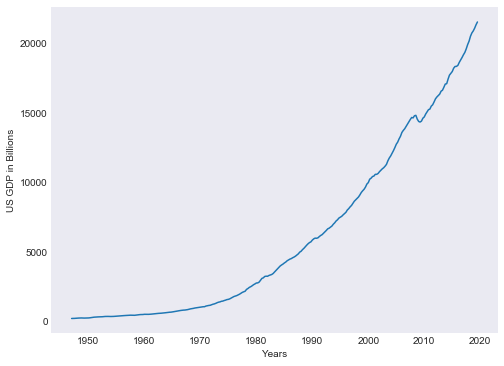

In [41]:
style = 'seaborn-dark'
plt.style.use(style)

fig, ax = plt.subplots(1,1,figsize=(8,6)) # creating figure & axis objects

ax.plot(gdp['DATE'], gdp['GDP']) # plot now on the *axis object*
ax.set_xlabel('Years') # note the set_ in the front!
ax.set_ylabel('US GDP in Billions')

plt.show()

So now we can see that the fonts are different and the background has changed color.  So, neat!

The only problem is that now *all* of our plots will be in this style:

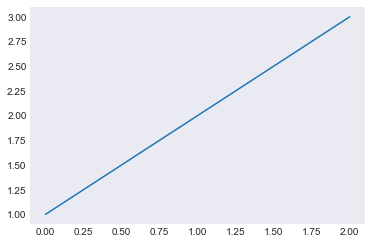

In [42]:
fig, ax = plt.subplots(1,1)

plt.plot([1,2,3])

plt.show()

If we want to use a certain plot style for *only* the cell we are currently running we can make use of the `with` keyword.

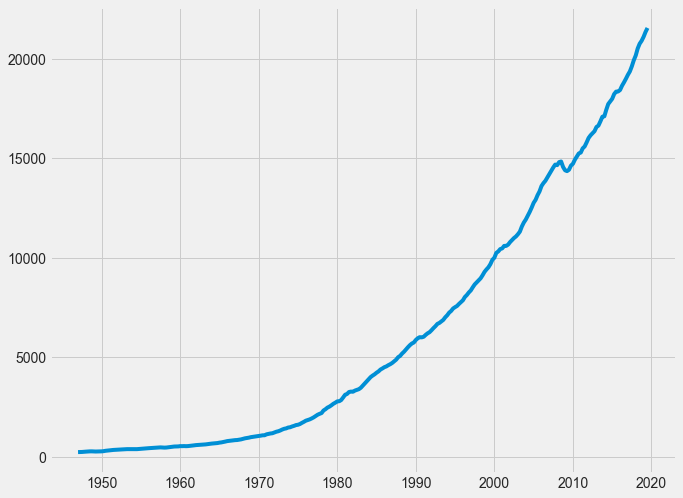

In [48]:
style = 'fivethirtyeight'
with plt.style.context(style): # here context means we'll plot *with this style but only in this context*
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot(gdp["DATE"], gdp["GDP"], '-')
    plt.show()

Now if we plot again:

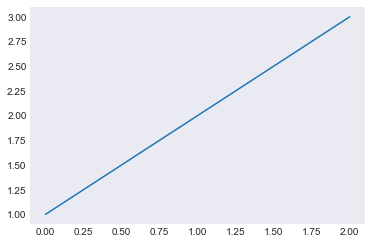

In [47]:
fig, ax = plt.subplots(1,1)

plt.plot([1,2,3])

plt.show()

We have whatever style we last used with `plt.style.use`.

If we want to try out a few different styles we can make a function:

In [49]:
def make_gdp_plot(style): # note, "style" is something you can gooogle if you want more options
    with plt.style.context(style):
        fig, ax = plt.subplots(figsize=(10, 8))
        ax.set_title("Style: " + style) # append 'Style:' and whatever style we chose
        ax.plot(gdp["DATE"], gdp["GDP"], '-')
        plt.show()

Now we can run our function.  Let's remind ourselves of our choses:

In [50]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

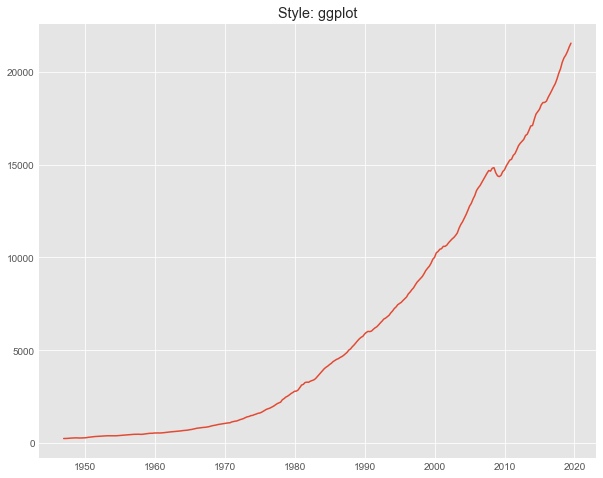

In [52]:
make_gdp_plot('ggplot')

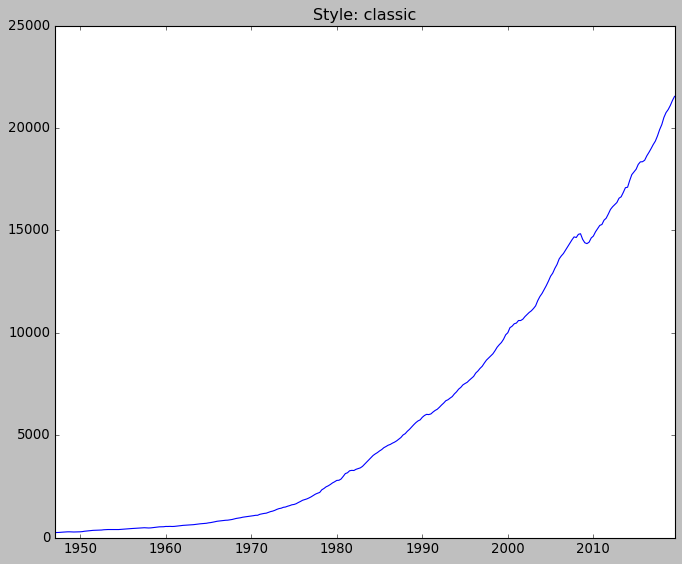

In [53]:
make_gdp_plot('classic')

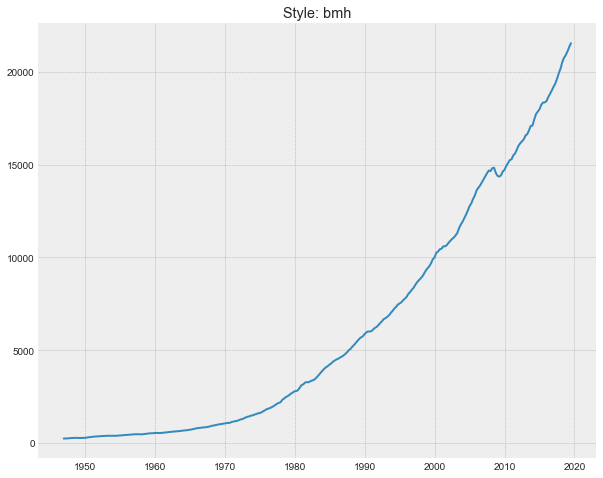

In [54]:
make_gdp_plot('bmh')

This plotting-with-a-function will come up later in class when we do this sort of thing interactively so stay tuned!